In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../data/500SKUs_data.csv'

In [2]:
df = pd.read_csv(path)

In [3]:
df.head()

,date,skuId,skuDescription,Hierarchy_1,Hierarchy_3,Hierarchy_5,quantity,priceIndex,revenue
0,12/30/2013,9781400032716,THE CURIOUS INCIDENT OF THE DOG IN THE NIGHTTIME,Fict Literary,Fiction,TRADE PAPERBACK,1,14.9500,13.45
1,12/30/2013,9781400205394,JESUS RELIGION WHY HE IS SO MUCH BETTER THAN T...,Christn Living,Religion/Inspiration,TRADE PAPERBACK,1,8.4900,8.49
2,12/31/2013,9780060530891,WHERES THE POOP,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,5,10.9900,52.75
3,12/31/2013,9780060570941,BECKHAM BOTH FEET ON THE GROUND AN AUTOBIOGRAPHY,Soccer Bio,Sports Team,TRADE PAPERBACK,4,14.0525,56.21
4,12/31/2013,9780060924584,RUN WITH THE HUNTED A CHARLES BUKOWSKI READER,Fict Literary,Fiction,TRADE PAPERBACK,7,16.9900,110.43


In [4]:
df.describe()

,skuId,quantity,priceIndex,revenue
count,4.326010e+05,432601.000000,432601.000000,432601.000000
mean,9.781032e+12,5.877772,18.056566,96.479803
std,8.801963e+08,17.242280,8.065938,293.663158
min,9.780061e+12,1.000000,0.000000,0.000000
25%,9.780447e+12,1.000000,13.990000,18.980000
50%,9.780818e+12,3.000000,16.000000,41.600000
75%,9.781477e+12,5.000000,19.990000,87.290000
max,9.789813e+12,1933.000000,75.000000,41325.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432601 entries, 0 to 432600
Data columns (total 9 columns):
date              432601 non-null object
skuId             432601 non-null int64
skuDescription    430223 non-null object
Hierarchy_1       432601 non-null object
Hierarchy_3       432601 non-null object
Hierarchy_5       432601 non-null object
quantity          432601 non-null int64
priceIndex        432601 non-null float64
revenue           432601 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 29.7+ MB


In [6]:
df['skuId'] = pd.to_numeric(df['skuId']) 
df['Hierarchy_1'] = df['Hierarchy_1'].astype(str)
df['Hierarchy_3'] = df['Hierarchy_3'].astype(str) 
df['Hierarchy_5'] = df['Hierarchy_5'].astype(str) 

In [7]:
df = df[['date', 'skuId', 'Hierarchy_1', 'Hierarchy_3',
       'Hierarchy_5', 'quantity', 'priceIndex', 'revenue']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432601 entries, 0 to 432600
Data columns (total 8 columns):
date           432601 non-null object
skuId          432601 non-null int64
Hierarchy_1    432601 non-null object
Hierarchy_3    432601 non-null object
Hierarchy_5    432601 non-null object
quantity       432601 non-null int64
priceIndex     432601 non-null float64
revenue        432601 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 26.4+ MB


In [9]:
df.isnull().sum()

date           0
skuId          0
Hierarchy_1    0
Hierarchy_3    0
Hierarchy_5    0
quantity       0
priceIndex     0
revenue        0
dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['skuId'].value_counts().count()

502

In [12]:
df['Hierarchy_1'].value_counts().count()

286

In [13]:
df['Hierarchy_3'].value_counts().count()

72

In [14]:
df['Hierarchy_5'].value_counts().count()

2

In [15]:
df['date'].value_counts().count()

1497

In [16]:
df['date'].max()

Timestamp('2018-02-11 00:00:00')

In [17]:
df['date'].min()

Timestamp('2013-12-30 00:00:00')

In [18]:
given_dates = df['date'].unique()
all_dates = pd.date_range(start='2013-12-30', end='2018-02-11')

In [19]:
len(all_dates)

1505

In [20]:
missing_dates = np.setdiff1d(all_dates, given_dates)

In [21]:
len(missing_dates)

8

In [22]:
missing_dates = pd.to_datetime(missing_dates)

In [23]:
missing_dates

DatetimeIndex(['2014-11-27', '2014-12-25', '2015-11-26', '2015-12-25',
               '2016-11-24', '2016-12-25', '2017-11-23', '2017-12-25'],
              dtype='datetime64[ns]', freq=None)

In [24]:
df['selling'] = df['revenue'] / df['quantity']

In [25]:
df['discount'] = df['priceIndex'] - df['selling']

In [26]:
df.head()

,date,skuId,Hierarchy_1,Hierarchy_3,Hierarchy_5,quantity,priceIndex,revenue,selling,discount
0,2013-12-30,9781400032716,Fict Literary,Fiction,TRADE PAPERBACK,1,14.9500,13.45,13.450000,1.500000
1,2013-12-30,9781400205394,Christn Living,Religion/Inspiration,TRADE PAPERBACK,1,8.4900,8.49,8.490000,0.000000
2,2013-12-31,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,5,10.9900,52.75,10.550000,0.440000
3,2013-12-31,9780060570941,Soccer Bio,Sports Team,TRADE PAPERBACK,4,14.0525,56.21,14.052500,0.000000
4,2013-12-31,9780060924584,Fict Literary,Fiction,TRADE PAPERBACK,7,16.9900,110.43,15.775714,1.214286


In [27]:
# df_2014 = df[(df['date'] >= '2014-01-01') & (df['date'] <= '2014-12-31')]

In [28]:
# df_2014_discount = df_2014[(df_2014['skuId'] == 9780060530891) & (df_2014['discount'] > 0)]
# df_2014_discount.head()

,date,skuId,Hierarchy_1,Hierarchy_3,Hierarchy_5,quantity,priceIndex,revenue,selling,discount
222,2014-01-01,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,1,10.99,9.89,9.890000,1.100000
658,2014-01-03,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,3,10.99,29.67,9.890000,1.100000
881,2014-01-04,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,5,10.99,51.65,10.330000,0.660000
1316,2014-01-06,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,3,10.99,30.77,10.256667,0.733333
1739,2014-01-08,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,5,10.99,50.55,10.110000,0.880000


In [72]:
df_no_discount = df[(df['discount'] == 0)]
# df_2014_no_discount = df_2014[(df_2014['skuId'] == 9780060530891) & (df_2014['discount'] == 0)]

# df_2014_no_discount.head()

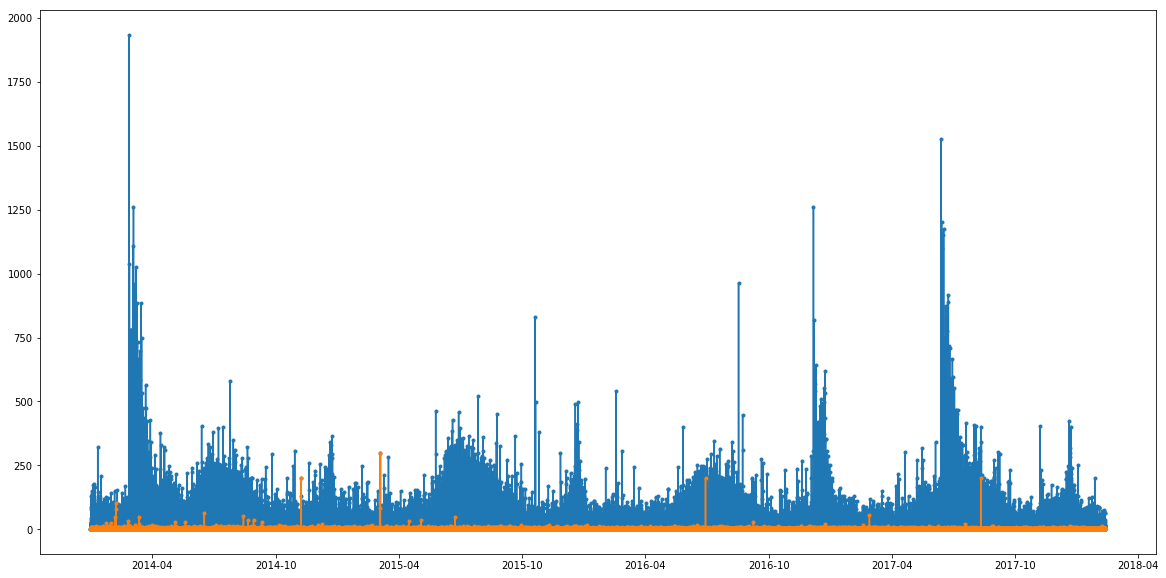

In [73]:
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['quantity'], marker='.')
plt.plot(df_no_discount['date'], df_no_discount['quantity'], marker='.')
plt.show()